In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import skdsp.signal.discrete as ds
import skdsp.signal.continuous as cs
import skdsp.signal.printer as pt
import numpy as np
import sympy as sp
import scipy.signal as cp
from ipywidgets import interact, fixed
np.seterr(all='ignore')
PI = sp.S.Pi
pi = np.pi

## 1.- Una sinusoide

In [7]:
def x1(omega=0, phi=0, envelope=False, zoom=False):
    npts = 10 if zoom else 25
    s = ds.Sinusoid(1, omega*PI, phi*PI)
    ns = np.arange(-npts, npts+1)
    plt.figure(figsize=(20, 4))
    if envelope:
        ne = np.arange(-npts-1, npts+1, 0.01)
        plt.plot(ne, s.eval(ne, True), 'k')
    ml = plt.stem(ns, s[ns], markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.setp(ml, ms=8)
    plt.axis([-npts-0.5, npts+0.5, -1.1, 1.1])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.title(pt.latex(s, mode='inline') + ', N = {0}'.format(s.period), size=24)

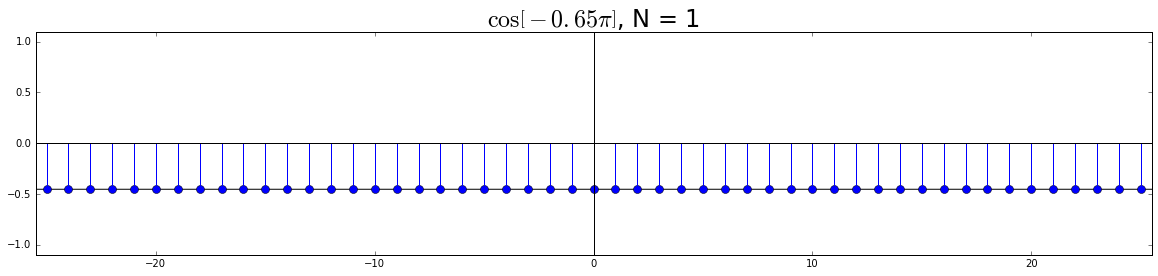

In [8]:
interact(x1, omega=(0, 2, 0.05), phi=(-1, 1, 0.05), envelope=True, zoom=False)

<function __main__.x1>

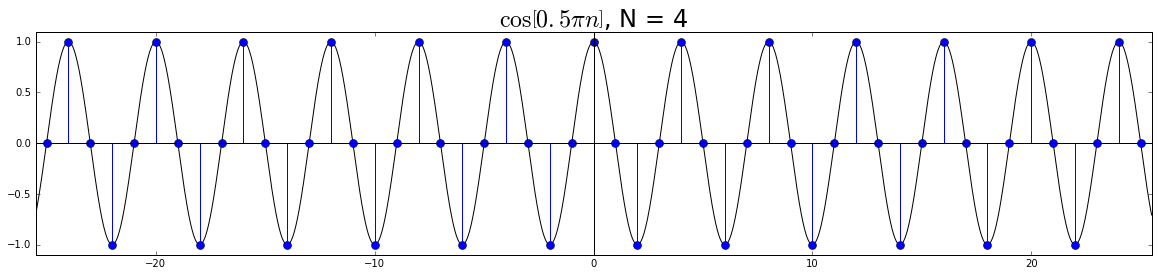

In [9]:
from ipywidgets import interact, FloatSlider, Checkbox, VBox, HBox
from IPython.display import display
Aw = FloatSlider(value=1, min=0.0, max=2.0, step=0.1, description='amplitud:', width=200)
Ow = FloatSlider(value=0.5, min=0.0, max=1.0, step=0.05, description='frecuencia:', width=200)
Pw = FloatSlider(value=0, min=0.0, max=2.0, step=0.1, description='fase:', width=200)
params = VBox(children=[Aw, Ow, Pw])
Ew = Checkbox(description='Dibujar envolvente:', value=True)
out = VBox(children=[Ew])
c1 = HBox(children=[params, out])
display(c1)
interact(x1, A=Aw, omega=Ow, phi=Pw, envelope=Ew)

## 2.- Dos sinusoides

In [12]:
def x2(A0=1, omega0=0, phi0=0, p0=False, A1=1, omega1=0, phi1=0, p1=False, envelope=True):
    npts = 25
    s0 = ds.Sinusoid(A0, omega0*PI, phi0*PI)
    s1 = ds.Sinusoid(A1, omega1*PI, phi1*PI)
    s = s0 + s1
    nd = np.arange(-npts, npts+1)
    plt.figure(figsize=(20, 4))
    ml = plt.stem(nd, s[nd], markerfmt='bo', linefmt='k-', basefmt='k')
    plt.setp(ml, ms=8)
    if envelope:
        ne = np.arange(-npts-1, npts+1, 0.01)
        plt.plot(ne, s.eval(ne, True), 'b')
    if p0:
        plt.stem(nd, s0[nd], markerfmt='ro', linefmt='k-')
    if p1:
        plt.stem(nd, s1[nd], markerfmt='go', linefmt='k-')
    plt.axis([-npts-0.5, npts+0.5, -2.1, 2.1])
    plt.axvline(0, color='k')    
    plt.axhline(0, color='k')
    plt.title(pt.latex(s, mode='inline') + ', N0 = {0}, N1 = {1}'.format(s0.period, s1.period), size=24)

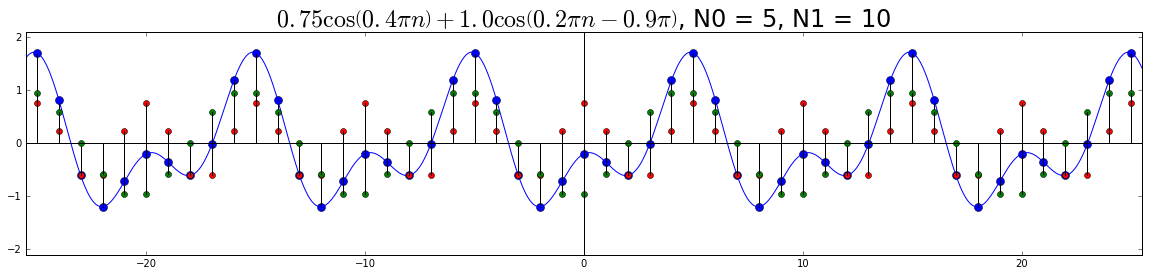

In [13]:
interact(x2, A0=(0, 1, 0.05), omega0=(0, 1, 0.05), phi0=(0, 2, 0.1), p0=True,
             A1=(0, 1, 0.05), omega1=(0, 1, 0.05), phi1=(0, 2, 0.1), p1=True, envelope=True)

## 3.- Componentes en fase y cuadratura

In [18]:
def xpq(A=1, omega=0, phi=0, in_phase=False, in_quadrature=True):
    npts = 10
    nd = np.arange(-npts, npts+1)
    ne = np.arange(-npts-1, npts+1, 0.01)
    s = ds.Sinusoid(A, omega*PI, phi*PI)
    sp = s.in_phase()
    sq = s.in_quadrature()
    plt.figure(figsize=(20, 4))
    ml = plt.stem(nd, s[nd], markerfmt='bo', linefmt='r-', basefmt='k-')
    plt.setp(ml, ms=8)
    plt.plot(ne, s.eval(ne, True), 'k')
    plt.axis([-npts-0.5, npts+0.5, -1.1, 1.1])
    if in_phase:
        plt.stem(nd, sp[nd], markerfmt='ro', linefmt='b-', basefmt='k-')
        plt.plot(ne, sp.eval(ne, True), 'b')
    if in_quadrature:
        plt.stem(nd, sq[nd], markerfmt='go', linefmt='g-', basefmt='k-')
        plt.plot(ne, sq.eval(ne, True), 'g')
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.title(r'${0} = {1} + {2}$'.format(pt.latex(s), pt.latex(sp), pt.latex(sq)), size=24)

<function __main__.xpq>

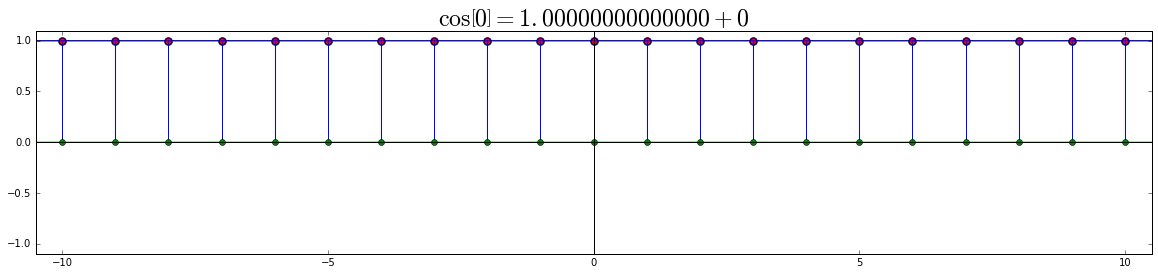

In [20]:
interact(xpq, A=(0, 1, 0.1), omega=(0, 1, 0.01), phi=(-1, 1, 0.05), in_phase=True, in_quadrature=True)

## 4.- Interferencias

In [21]:
def x3(omega=0.8, alfa=0.2, tau=5, ps0=True, ps1=True, envelope=True):
    npts = 10
    s0 = ds.Sinusoid(1, omega*PI)
    s1 = alfa*(s0 >> tau)
    s = s0 + s1
    nd = np.arange(-npts, npts+1)
    plt.figure(figsize=(20, 4))
    plt.subplot(1,2,1)
    ml = plt.stem(nd, s[nd], markerfmt='bo', linefmt='k-')
    plt.setp(ml, ms=8)
    if envelope:
        ne = np.arange(-npts-1, npts+1, 0.01)
        plt.plot(ne, s.eval(ne, True), 'b')
    if ps0:
        plt.stem(nd, s0[nd], markerfmt='ro', linefmt='k-')
    if ps1:
        plt.stem(nd, s1[nd], markerfmt='go', linefmt='k-')
    plt.axis([-npts-0.5, npts+0.5, -2.1, 2.1])
    plt.axvline(0, color='k')    
    plt.axhline(0, color='k')
    plt.title(pt.latex(s), size=16)
    # espectro
    if tau == 0:
        B = 1 + alfa
    else:
        B = np.r_[1, [0]*(tau-1), alfa]
    om, H = cp.freqz(B, [1], 500)
    H = np.abs(H)
    plt.subplot(1,2,2)
    plt.plot(om/pi, H, 'k')
    plt.axhline(0, color='k')    
    plt.plot([0, omega, omega], [H[int(500*omega)], H[int(500*omega)], 0], '--r')
    pt = [omega, H[int(500*omega)]]
    plt.plot(pt[0], pt[1], 'ro')
    plt.text(pt[0]+ (0.01 if omega < 0.8 else -0.16), pt[1]-0.035, '[{0[0]:.2f},{0[1]:.2f}]'.format(pt), size=14)
    plt.axis([0, om[-1]/pi, 0, 2.1])
    plt.grid(True)
    plt.title('Respuesta en frecuencia', size=14)

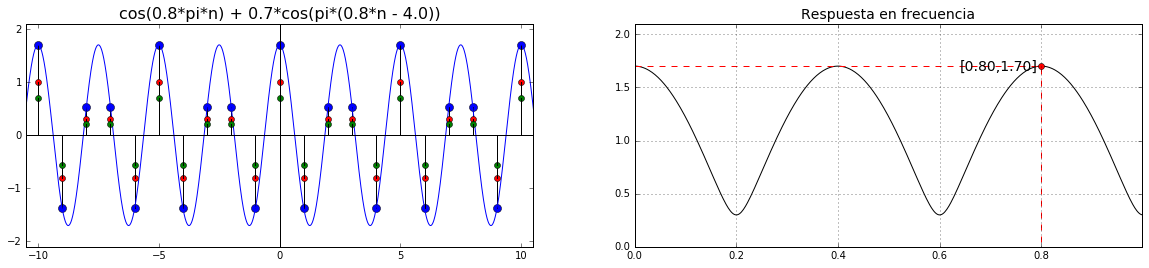

In [10]:
interact(x3, omega=(0, 0.99, 0.01), alfa=(0, 1, 0.1), tau=(0, 20, 1))